In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[ 1  0  1  5 10 10  8 18 25 40 29 38 38 48 48 44 32 34 22 13  9 12  8  2
  5]
[1.         0.         1.         2.23606798 3.16227766 3.16227766
 2.82842712 4.24264069 5.         6.32455532 5.38516481 6.164414
 6.164414   6.92820323 6.92820323 6.63324958 5.65685425 5.83095189
 4.69041576 3.60555128 3.         3.46410162 2.82842712 1.41421356
 2.23606798]


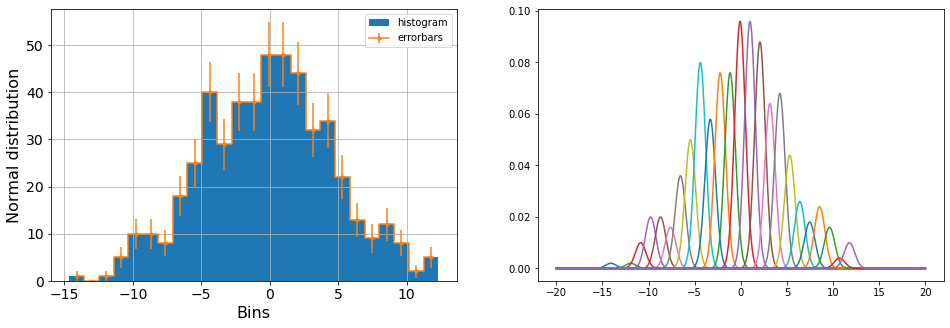

In [2]:
mu = 0 
sigma = 5
x = np.random.normal(mu, sigma, 500)
x_histogram = np.histogram(x, bins = 25)
dist = x_histogram[0]
bins = x_histogram[1]
bincentres = [(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax.hist(x, bins=25, label='histogram')
print(dist)
print(dist ** 0.5)
ax.errorbar(bincentres, dist, yerr = 
            dist ** 0.5, marker = '.', drawstyle = 'steps-mid', label='errorbars')
ax.grid()
ax.set_xlabel('Bins', fontsize=16)
ax.set_ylabel('Normal distribution', fontsize=16)
ax.tick_params(labelsize=14)
ax.tick_params(labelsize=14)
ax.legend()

 
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

norm_constant = 1/np.sum(dist)
for idx, dist_ in enumerate(dist):
    x = np.linspace(-20, 20, 1000)
    y = norm_constant * dist_ * gaussian(x, bincentres[idx], 1.06 * (500 / 25) ** (-0.2))
    ax2.plot(x, y)


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

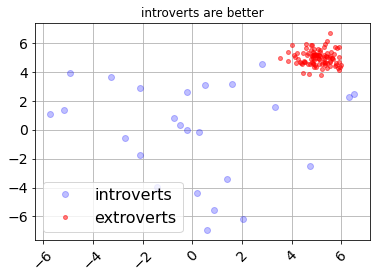

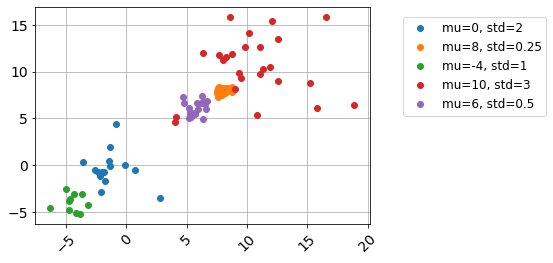

In [3]:
def generate_datasets(*argv):
    datasets = []
    for arg in argv:
        mu, std, size = arg
        dataset = {'data': np.random.normal(mu, std, (2, size)), 'mu': mu, 'std': std, 'n': size}
        datasets.append(dataset)
    return datasets


# n = 2
dset1, dset2 = generate_datasets((0, 3, 25), (5, 0.5, 100))
plt.plot(dset1['data'][0], dset1['data'][1], 'bo',  alpha=.25, markersize = 6, label="introverts")   # category 1
plt.plot(dset2['data'][0], dset2['data'][1], 'ro',  alpha=.50, markersize = 4, label="extroverts")   # category 2 
# ticks
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
# grid
plt.grid()
# legend
plt.legend(prop={'size': 16})
# title
plt.title('introverts are better')
plt.show()


# n = 5
datasets = generate_datasets((0, 2, 15), (8, 0.25, 50), (-4, 1, 10), (10, 3, 25), (6, 0.5, 20))
for dset in datasets:
    plt.plot(dset['data'][0], dset['data'][1], 'o', label=f"mu={dset['mu']}, std={dset['std']}")
# ticks
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
# grid
plt.grid()
# legend
plt.legend(loc=(1.1,0.5), prop={'size': 12})

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

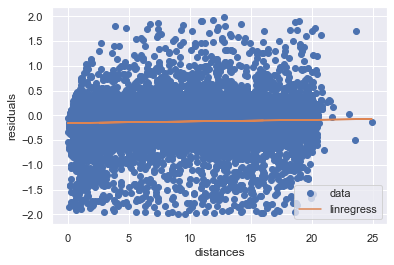

0.003264762461952363


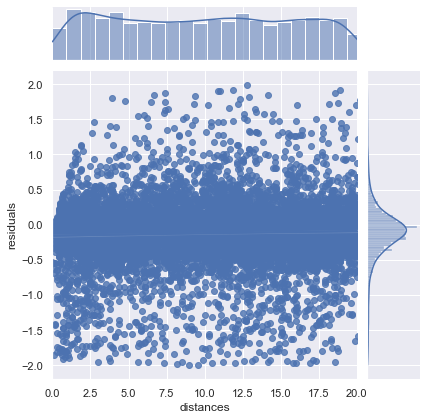

In [4]:
sns.set(style="darkgrid")

x = np.load('residuals_261.npy', allow_pickle=True)
df = pd.DataFrame(x.item())
for entry in df.iterrows():
    if abs(entry[1]['residuals']) > 2:
        df = df.drop(entry[0])

distances = np.array(df['distances'])
residuals = np.array(df['residuals'])

# linear regression plot w/o seaborn
slope, intercept, *_, slope_err, intercept_err = stats.linregress(distances, residuals)
plt.plot(distances, residuals, 'o', label='data')
plt.plot(distances, slope * distances + intercept, label='linregress')
plt.xlabel('distances')
plt.ylabel('residuals')
plt.legend()
plt.show()
print(slope)

# with seaborn
sns.jointplot(data=df, x="distances", y="residuals", kind="reg", xlim=(0,20))

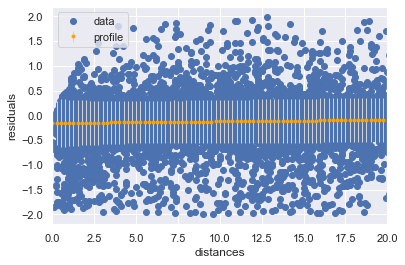

In [5]:
a = 0
b = 20
step = 0.25
x = np.arange(a, b, step)

y = []
yerr = []
for x_ in x:
    mask = np.where(distances < x_ + step)[0]
    y.append(np.mean(residuals[mask]))
    yerr.append(np.std(residuals[mask]))


plt.plot(distances, residuals, 'o', label='data', zorder=1)
plt.errorbar(x, slope * x + intercept, yerr = yerr, label='profile', zorder=2, fmt='o', color='orange',
             ecolor='lightgray', elinewidth=1, markersize=3)
plt.xlabel('distances')
plt.ylabel('residuals')
plt.xlim(0, 20)
plt.legend()
plt.show()
